In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install imageio-ffmpeg
!pip install moviepy
!pip install pydub
!pip install speechrecognition
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 24.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip uninstall moviepy
!pip uninstall imageio-ffmpeg
!pip install imageio-ffmpeg
!pip install moviepy

Found existing installation: moviepy 1.0.3
Uninstalling moviepy-1.0.3:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/moviepy-1.0.3.dist-info/*
    /usr/local/lib/python3.9/dist-packages/moviepy/*
Proceed (Y/n)? y
  Successfully uninstalled moviepy-1.0.3
Found existing installation: imageio-ffmpeg 0.4.8
Uninstalling imageio-ffmpeg-0.4.8:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/imageio_ffmpeg-0.4.8.dist-info/*
    /usr/local/lib/python3.9/dist-packages/imageio_ffmpeg/*
Proceed (Y/n)? y
  Successfully uninstalled imageio-ffmpeg-0.4.8
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 50.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for moviepy: f

In [4]:
!pip install SpeechRecognition 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import os
import moviepy.editor as mp
import speech_recognition as sr 
from pydub import AudioSegment
from pydub.silence import split_on_silence
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest
import datetime

In [7]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

In [8]:
# Define a function to transcribe a large audio file
def get_large_audio_transcription(path):
    # Load the audio file
    sound = AudioSegment.from_file(path, format="mp4")
    sound.export("/content/drive/MyDrive/PROJECTS/video analysis/audio.wav", format="wav")
    audio = AudioSegment.from_wav("/content/drive/MyDrive/PROJECTS/video analysis/audio.wav")

    # Split the audio into chunks based on silence
    chunks = split_on_silence(audio,
        min_silence_len=500,
        silence_thresh=audio.dBFS-14,
        keep_silence=500,
    )
    r = sr.Recognizer()

    # Create a directory to store the audio chunks
    folder_name = "audio-chunks"
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)

    # Transcribe each chunk using Google Speech Recognition
    transcript = ""
    for i, audio_chunk in enumerate(chunks, start=1):
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                transcript += text

    return transcript

In [11]:
# Generate the transcript
transcript = get_large_audio_transcription("/content/drive/MyDrive/PROJECTS/video analysis/plate-tectonics-and-california-geology-y2bs.com.mp4")

Error: 


In [12]:
with open("/content/drive/MyDrive/PROJECTS/video analysis/transcript.txt", "w") as f:
    f.write(transcript)



In [13]:
print(transcript)

So now that we have the basics down for plate tectonics. What it is how it works and how we know about it so what. How does plate tectonics affect life in california or anywhere else for that matter. To answer that let's look at california's current plate tectonic setting. As this map shows we have a number of plate boundaries within or near the state. Notice at the northern part of california we have a divergent plate boundary or an offshore seafloor spreading center where new oceanic crust forms and then is pushed away. Here along the coast that crust collides with and then sinks under northern california. That produces a convergent plate boundary. Where plate with an oceanic crust leading edge collides with a plate with continental crust on the edge. Result. Subduction. A trench earthquakes and inland an active chain of volcanoes. This volcanic chain is known as the cascade mountains. And in california is expressed with the active volcanoes of mount lassen and mount shasta. The most

In [14]:
len(transcript)

7472

In [15]:
import wave
import numpy as np
import matplotlib.pyplot as plt
audio_file = wave.open("/content/drive/MyDrive/PROJECTS/video analysis/audio.wav", "rb")
frames = audio_file.readframes(-1)

sample_rate = audio_file.getframerate()
num_channels = audio_file.getnchannels()

audio_array = np.frombuffer(frames, dtype=np.int16)

if num_channels > 1:
    audio_array = np.mean(audio_array.reshape(-1, num_channels), axis=1)

time_axis = np.linspace(0, len(audio_array) / sample_rate, num=len(audio_array))



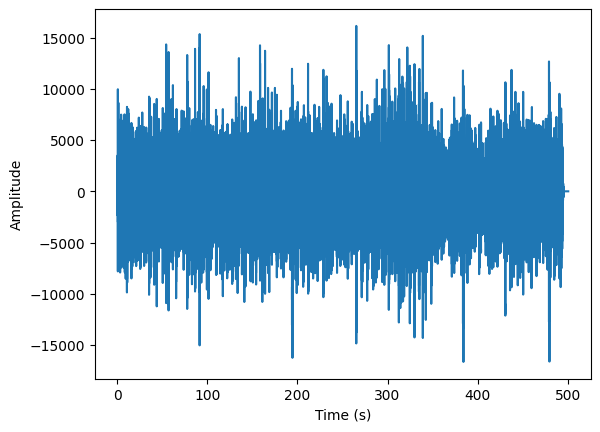

In [16]:
plt.plot(time_axis, audio_array)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [17]:
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-17 13:27:41.898784: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
import heapq
import spacy

In [19]:

nlp = spacy.load("en_core_web_sm")


In [20]:
# Load transcribed text from video
with open("/content/drive/MyDrive/PROJECTS/video analysis/transcript.txt", "r") as f:
    text = f.read()

In [21]:
# Convert text to sentences
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]
sentences

['So now that we have the basics down for plate tectonics.',
 'What it is how it works and how we know about it',
 'so what.',
 'How does plate tectonics affect life in california or anywhere else for that matter.',
 "To answer that let's look at california's current plate tectonic setting.",
 'As this map shows we have a number of plate boundaries within or near the state.',
 'Notice at the northern part of california we have a divergent plate boundary or an offshore seafloor spreading center where new oceanic crust forms and then is pushed away.',
 'Here along the coast that crust collides with and then sinks under northern california.',
 'That produces a convergent plate boundary.',
 'Where plate with an oceanic crust leading edge collides with a plate with continental crust on the edge.',
 'Result.',
 'Subduction.',
 'A trench earthquakes and inland an active chain of volcanoes.',
 'This volcanic chain is known as the cascade mountains.',
 'And in california is expressed with the a

In [22]:
tokens = [token.text for token in doc]
print(tokens)

['So', 'now', 'that', 'we', 'have', 'the', 'basics', 'down', 'for', 'plate', 'tectonics', '.', 'What', 'it', 'is', 'how', 'it', 'works', 'and', 'how', 'we', 'know', 'about', 'it', 'so', 'what', '.', 'How', 'does', 'plate', 'tectonics', 'affect', 'life', 'in', 'california', 'or', 'anywhere', 'else', 'for', 'that', 'matter', '.', 'To', 'answer', 'that', 'let', "'s", 'look', 'at', 'california', "'s", 'current', 'plate', 'tectonic', 'setting', '.', 'As', 'this', 'map', 'shows', 'we', 'have', 'a', 'number', 'of', 'plate', 'boundaries', 'within', 'or', 'near', 'the', 'state', '.', 'Notice', 'at', 'the', 'northern', 'part', 'of', 'california', 'we', 'have', 'a', 'divergent', 'plate', 'boundary', 'or', 'an', 'offshore', 'seafloor', 'spreading', 'center', 'where', 'new', 'oceanic', 'crust', 'forms', 'and', 'then', 'is', 'pushed', 'away', '.', 'Here', 'along', 'the', 'coast', 'that', 'crust', 'collides', 'with', 'and', 'then', 'sinks', 'under', 'northern', 'california', '.', 'That', 'produces', 

In [23]:
doc

So now that we have the basics down for plate tectonics. What it is how it works and how we know about it so what. How does plate tectonics affect life in california or anywhere else for that matter. To answer that let's look at california's current plate tectonic setting. As this map shows we have a number of plate boundaries within or near the state. Notice at the northern part of california we have a divergent plate boundary or an offshore seafloor spreading center where new oceanic crust forms and then is pushed away. Here along the coast that crust collides with and then sinks under northern california. That produces a convergent plate boundary. Where plate with an oceanic crust leading edge collides with a plate with continental crust on the edge. Result. Subduction. A trench earthquakes and inland an active chain of volcanoes. This volcanic chain is known as the cascade mountains. And in california is expressed with the active volcanoes of mount lassen and mount shasta. The most

In [24]:
# Calculate sentence scores based on word frequency
word_frequencies = {}
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
for word in doc:
    if word.text.lower() not in STOP_WORDS:
        if word.text.lower() not in word_frequencies.keys():
            word_frequencies[word.text.lower()] = 1
        else:
            word_frequencies[word.text.lower()] += 1

In [25]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [26]:
word_frequencies

{'basics': 1,
 'plate': 12,
 'tectonics': 3,
 '.': 89,
 'works': 1,
 'know': 1,
 'affect': 1,
 'life': 1,
 'california': 7,
 'matter': 1,
 'answer': 1,
 'let': 2,
 'look': 2,
 'current': 1,
 'tectonic': 1,
 'setting': 1,
 'map': 1,
 'shows': 2,
 'number': 1,
 'boundaries': 2,
 'near': 1,
 'state': 3,
 'notice': 2,
 'northern': 3,
 'divergent': 2,
 'boundary': 4,
 'offshore': 1,
 'seafloor': 5,
 'spreading': 10,
 'center': 7,
 'new': 2,
 'oceanic': 3,
 'crust': 9,
 'forms': 1,
 'pushed': 2,
 'away': 1,
 'coast': 1,
 'collides': 2,
 'sinks': 1,
 'produces': 2,
 'convergent': 1,
 'leading': 1,
 'edge': 4,
 'continental': 5,
 'result': 2,
 'subduction': 11,
 'trench': 3,
 'earthquakes': 2,
 'inland': 1,
 'active': 5,
 'chain': 2,
 'volcanoes': 7,
 'volcanic': 6,
 'known': 4,
 'cascade': 1,
 'mountains': 4,
 'expressed': 1,
 'mount': 3,
 'lassen': 2,
 'shasta': 1,
 'recent': 4,
 'eruption': 3,
 'area': 3,
 'explosive': 2,
 'depicted': 1,
 'image': 2,
 '22nd': 1,
 '1915': 1,
 'happens': 2,
 

In [27]:
max_frequency = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/max_frequency)

In [28]:
max_frequency

89

In [29]:
sentence_scores = {}
for sent in sentences:
    for word in sent.split():
        if word.lower() in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word.lower()]
                else:
                    sentence_scores[sent] += word_frequencies[word.lower()]

In [30]:
sentence_scores

{'So now that we have the basics down for plate tectonics.': 0.14606741573033707,
 'What it is how it works and how we know about it': 0.02247191011235955,
 'How does plate tectonics affect life in california or anywhere else for that matter.': 0.2696629213483146,
 "To answer that let's look at california's current plate tectonic setting.": 0.19101123595505617,
 'As this map shows we have a number of plate boundaries within or near the state.': 0.21348314606741572,
 'Notice at the northern part of california we have a divergent plate boundary or an offshore seafloor spreading center where new oceanic crust forms and then is pushed away.': 0.7865168539325842,
 'Here along the coast that crust collides with and then sinks under northern california.': 0.1797752808988764,
 'That produces a convergent plate boundary.': 0.16853932584269662,
 'Where plate with an oceanic crust leading edge collides with a plate with continental crust on the edge.': 0.6404494382022472,
 'A trench earthquakes a

In [31]:
# Set summarization parameters
percentage = int(input("enter how much percentage you need to read")) # user-specified percentage
max_length = len(sentences) * percentage // 100 # calculate max length of summary

# Generate summary
summary_sentences = heapq.nlargest(max_length, sentence_scores, key=sentence_scores.get)
summary = " ".join(str(sent) for sent in summary_sentences)
print(summary)
# Save summary to file
with open("/content/drive/MyDrive/PROJECTS/video analysis/summary.txt", "w") as f:
    f.write(summary)


enter how much percentage you need to read75
Notice at the northern part of california we have a divergent plate boundary or an offshore seafloor spreading center where new oceanic crust forms and then is pushed away. In this region of rifting and thin crust mantle rock is melting and rising beneath the surface just like what happens at seafloor spreading divergent plate boundaries. Where plate with an oceanic crust leading edge collides with a plate with continental crust on the edge. The western continental margin of north america was a large long subduction zone with associated volcanoes and terrain accretion. This long transform boundary that connects these two sections of ocean ridge is known as the san andreas fault system. During that time ocean crust was carried into the subduction zones and portions of what it carried were scraped off and attached to the edge of the continent. Let's leave this unique volcanic region and return to the remnants of the ancient subduction zone vol

In [32]:
print(summary)

Notice at the northern part of california we have a divergent plate boundary or an offshore seafloor spreading center where new oceanic crust forms and then is pushed away. In this region of rifting and thin crust mantle rock is melting and rising beneath the surface just like what happens at seafloor spreading divergent plate boundaries. Where plate with an oceanic crust leading edge collides with a plate with continental crust on the edge. The western continental margin of north america was a large long subduction zone with associated volcanoes and terrain accretion. This long transform boundary that connects these two sections of ocean ridge is known as the san andreas fault system. During that time ocean crust was carried into the subduction zones and portions of what it carried were scraped off and attached to the edge of the continent. Let's leave this unique volcanic region and return to the remnants of the ancient subduction zone volcanoes now exposed as granite in the central 

In [33]:
len(summary)

5858

In [34]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:

from rouge import Rouge
# Initialize ROUGE calculator
rouge = Rouge()

# Calculate ROUGE score
scores = rouge.get_scores(summary, transcript)

# Print ROUGE-1 score
print("ROUGE-1 Precision:", scores[0]["rouge-1"]["p"])
print("ROUGE-1 Recall:", scores[0]["rouge-1"]["r"])
print("ROUGE-1 F1-Score:", scores[0]["rouge-1"]["f"])


ROUGE-1 Precision: 1.0
ROUGE-1 Recall: 0.8333333333333334
ROUGE-1 F1-Score: 0.9090909041322315


In [36]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
pip install python-rake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
pip install rake-nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from rake_nltk import Rake

r = Rake()
# apply RAKE to the transcript
r.extract_keywords_from_text(transcript)

# get the top 10 keywords
keywords = r.get_ranked_phrases_with_scores()[:10]

KEYWORDS = [t[1] for t in keywords]
print(KEYWORDS)

['pacific ocean look like 80 million years ago', '000 years ago left bits', '9 earthquake caused significant shaking', 'san andreas fault system began', 'atlantic ocean spread north america', '25 million years ago', 'seafloor spreading divergent plate boundaries', 'past 80 million years', 'oceanic crust leading edge collides', 'ocean ridge seafloor spreading center']


In [43]:
import pandas as pd

In [44]:
from rake_nltk import Rake
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from moviepy.editor import VideoFileClip
from datetime import timedelta

r = Rake()
# apply RAKE to the transcript
r.extract_keywords_from_text(transcript)

# get the top 10 keywords
keywords = r.get_ranked_phrases_with_scores()[:10]

KEYWORDS = [t[1] for t in keywords]
print(KEYWORDS)


# Load transcript
with open('/content/drive/MyDrive/PROJECTS/video analysis/transcript.txt', 'r') as file:
    transcript = file.read().replace('\n', '')

# Load video
video = VideoFileClip('/content/drive/MyDrive/PROJECTS/video analysis/Video.mp4')


timestamps = {}
for keyword in KEYWORDS:
    # Tokenize keyword
    keyword_tokens = word_tokenize(keyword)

    # Find time stamps
    for idx, sentence in enumerate(transcript.split('.')):
        if all(token.lower() in sentence.lower() for token in keyword_tokens):
            time_in_seconds = video.duration / len(transcript.split('.')) * idx
            timestamps[keyword] = str(timedelta(seconds=time_in_seconds))

# Convert to pandas DataFrame
df = pd.DataFrame.from_dict(timestamps, orient='index', columns=['time'])
df.index.name = 'keyword'

# Sort DataFrame by time
df = df.sort_values('time')

print(df)


['pacific ocean look like 80 million years ago', '000 years ago left bits', '9 earthquake caused significant shaking', 'san andreas fault system began', 'atlantic ocean spread north america', '25 million years ago', 'seafloor spreading divergent plate boundaries', 'past 80 million years', 'oceanic crust leading edge collides', 'ocean ridge seafloor spreading center']
                                                         time
keyword                                                      
oceanic crust leading edge collides            0:00:59.426813
9 earthquake caused significant shaking        0:03:27.993846
pacific ocean look like 80 million years ago   0:03:50.278901
ocean ridge seafloor spreading center          0:03:50.278901
past 80 million years                          0:04:05.135604
atlantic ocean spread north america            0:04:12.563956
25 million years ago                           0:04:27.420659
san andreas fault system began                 0:04:42.277363
seafloor s